In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
df=pd.read_csv('new_model.csv')
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [4]:
df.shape

(400, 14)

In [5]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize LabelEncoder
label_encoder = LabelEncoder()

# Step 2: Encode the 'Htn' and 'Class' columns (as these are categorical/binary)
df['Htn'] = label_encoder.fit_transform(df['Htn'])
df['Class'] = label_encoder.fit_transform(df['Class'])

# Now 'Htn' and 'Class' columns are encoded
print("Categorical encoding complete.")
df.head()

Categorical encoding complete.


,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,2,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,2,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0,1


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Select numerical columns to be scaled
numerical_cols = ['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns (apply feature scaling)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now the numerical columns are scaled
print("Feature scaling (normalization) complete.")
df.head()

Feature scaling (normalization) complete.


,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,0.263379,0.421486,-0.011804,-0.380269,0.36489,-0.434856,-0.333725,0.000106,0.000763,1.059100,-0.240506,0.585900,2,1
1,-1.965500,0.421486,2.349029,-0.380269,0.36489,-0.800529,-0.405020,0.000106,0.000763,-0.452268,-0.954773,0.002055,0,1
2,0.263379,-1.421074,0.775140,2.507853,0.36489,-0.089498,-0.226782,0.000106,0.000763,-1.078932,-0.359550,0.002055,0,1
3,-0.479581,-2.342354,2.349029,-0.380269,0.36489,-0.028553,0.129695,-2.885860,-0.755560,-0.489130,-0.677003,-0.963076,2,1
4,0.263379,-1.421074,0.775140,-0.380269,0.36489,-0.638008,-0.298077,0.000106,0.000763,-0.341680,-0.438913,-0.129012,0,1


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Separate the features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features: all columns except 'Class'
y = df['Class']                 # Target: the 'Class' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting sets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (320, 13), y_train: (320,)
Testing set shape: X_test: (80, 13), y_test: (80,)


In [9]:
import pandas as pd
from sklearn.feature_selection import chi2

# For Chi-Square test, we assume 'Htn' is a categorical feature and others are encoded or non-negative
# Apply Chi-Square test
chi2_scores, p_values = chi2(X.abs(), y)  # .abs() ensures all values are non-negative

# Create a DataFrame to hold the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
})

# Sort the results by Chi2 score in descending order
chi2_results_sorted = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Display the top 10 features based on Chi2 score
print(chi2_results_sorted.head(10))


   Feature  Chi2 Score       P-value
12     Htn  171.257658  3.930857e-39
4      Rbc   29.036949  7.101089e-08
3       Su   26.007736  3.400520e-07
5       Bu   11.878664  5.678065e-04
11    Rbcc    8.543318  3.467929e-03
9     Hemo    7.866184  5.036783e-03
0       Bp    7.250105  7.089685e-03
6       Sc    4.153451  4.154975e-02
8      Pot    3.654412  5.592088e-02
7      Sod    2.175484  1.402254e-01


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import chi2

# Select the top features based on Chi2 scores (e.g., top 10)
top_features = chi2_results_sorted.head(10)['Feature'].values

# Filter the dataset to only include top features
X_selected = X[top_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Display non-zero coefficients
non_zero_features = X_selected.columns[lasso_model.coef_ != 0]
print(f'Non-zero features: {non_zero_features}')


Mean Squared Error: 0.08
R^2 Score: 0.67
Non-zero features: Index(['Htn', 'Rbc', 'Su', 'Bu', 'Rbcc', 'Hemo', 'Bp', 'Sod'], dtype='object')


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:45:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of the XGBoost Classifier: 98.75%


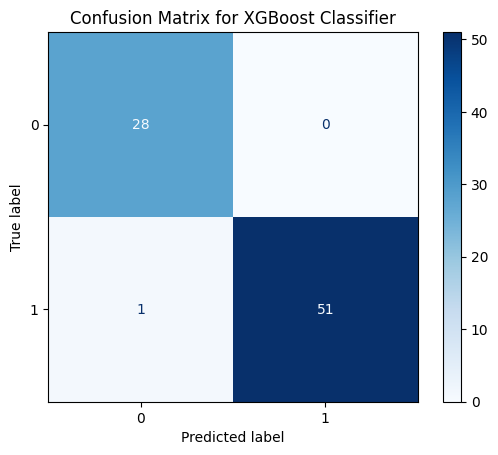

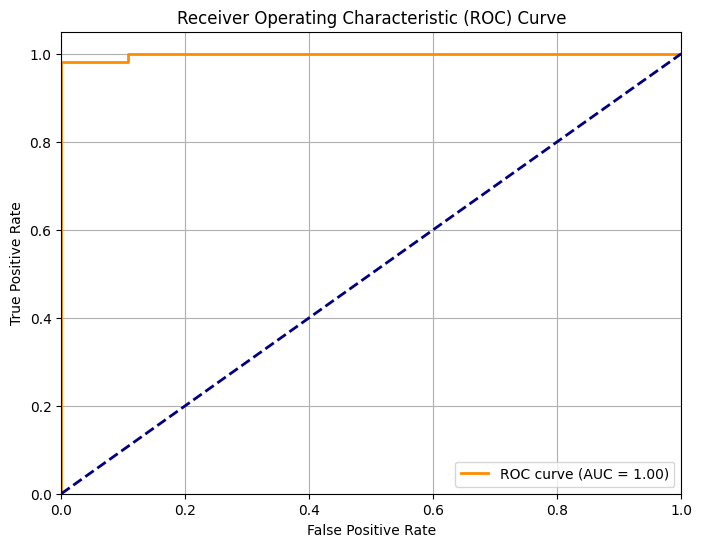

In [14]:
import pandas as pd
import matplotlib.pyplot as plt  # Importing pyplot for plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Filter the dataset to only include non-zero features
X_selected_final = X_selected[non_zero_features]

# Split the dataset again for XGBoost, ensuring the correct feature set is used
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_selected_final, y, test_size=0.2, random_state=42)

# Train the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred = xgb_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test_final, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy * 100:.2f}%')  # Display accuracy in percentage

# Confusion Matrix
cm = confusion_matrix(y_test_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Calculate predicted probabilities for the positive class
y_pred_proba = xgb_model.predict_proba(X_test_final)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of the AdaBoost Classifier: 98.75%


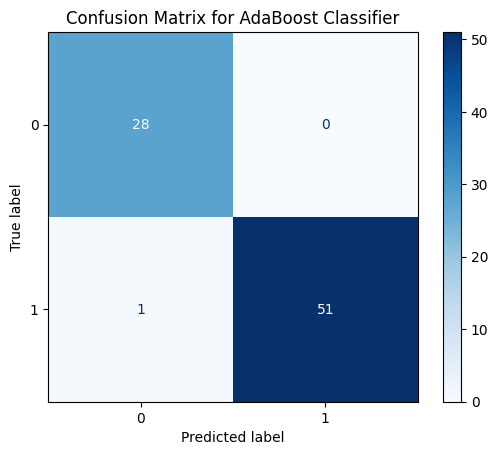

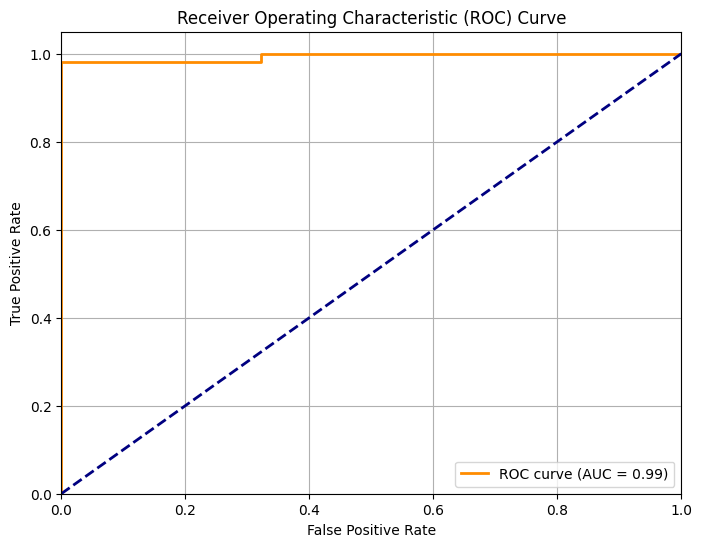

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Filter the dataset to only include non-zero features
X_selected_final = X_selected[non_zero_features]

# Split the dataset again for AdaBoost, ensuring the correct feature set is used
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_selected_final, y, test_size=0.2, random_state=42)

# Train the AdaBoost Classifier with a Decision Tree as the base estimator
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Using a simple Decision Tree as the base estimator
    n_estimators=50,  # Number of boosting stages
    random_state=42
)
ada_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred = ada_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test_final, y_pred)
print(f'Accuracy of the AdaBoost Classifier: {accuracy * 100:.2f}%')  # Display accuracy in percentage

# Confusion Matrix
cm = confusion_matrix(y_test_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

# Calculate predicted probabilities for the positive class
y_pred_proba = ada_model.predict_proba(X_test_final)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Accuracy of the Gradient Boosting Classifier: 97.50%


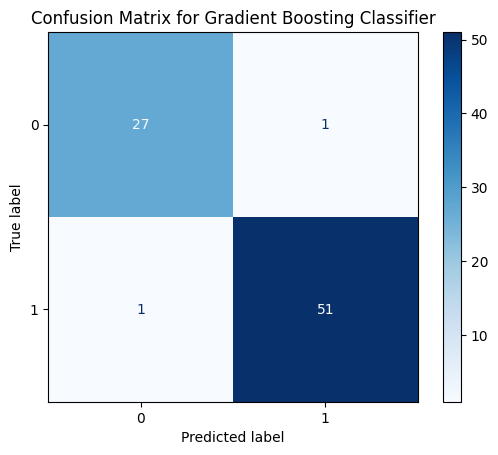

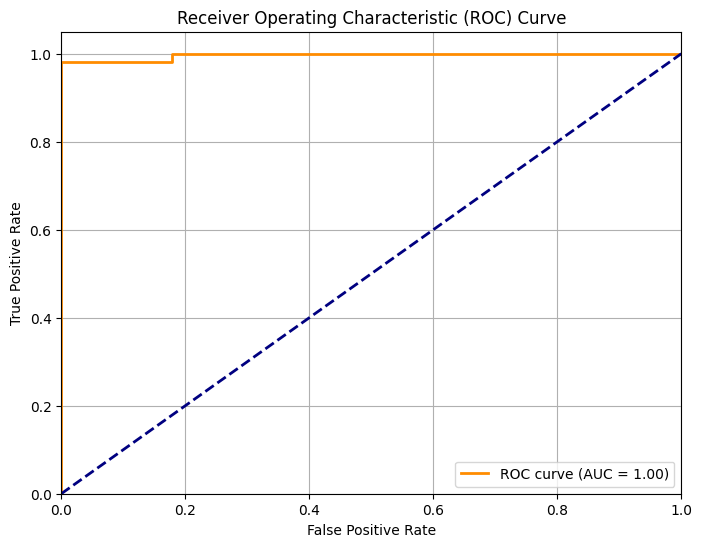

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Filter the dataset to only include non-zero features
X_selected_final = X_selected[non_zero_features]

# Split the dataset again for Gradient Boosting, ensuring the correct feature set is used
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_selected_final, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred = gb_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test_final, y_pred)
print(f'Accuracy of the Gradient Boosting Classifier: {accuracy * 100:.2f}%')  # Display accuracy in percentage

# Confusion Matrix
cm = confusion_matrix(y_test_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Calculate predicted probabilities for the positive class
y_pred_proba = gb_model.predict_proba(X_test_final)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
